## Введение в анализ данных, ИАД-6

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнил(а):  Новиков Владимир

### Общая информация

__Дата выдачи:__ 06.02.2020

__Дедлайн:__ 17.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$, $s_{\text{pandas}}$ и $s_{\text{matplotlib}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждые 2 задачи сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) идет балл в бонус. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл от оценки в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

Необходимое, но не достаточное условие для успешного выполнения этой части — вам необходимо пройти все `assert`'ы.

In [5]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес проверочных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [18]:
def result_mark(weights: np.array, marks: np.array) -> int:
    res = int(np.sum(weights * marks))
    return res
    
    # your code here

In [19]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [20]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$). Например, для `a = np.array([4, 2, 6, 3])` и `b = np.array([4, 3, 6, -3])` ответом является кортеж `(4, 6)`.

In [9]:
def minMaxEqual(a: np.array, b: np.array) -> tuple:
    #ab = np.column_stack((a, b)) 
    #cond = (a == b)    
    res = np.extract(a == b, b)
    min = np.min(res)
    max = np.max(res)
    return (min,max)
    # your code here

In [10]:
a = np.array([4, 2, 6, 3])
b = np.array([4, 3, 6, -3])

assert minMaxEqual(a, b) == (4, 6)

In [11]:
a = np.array([0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0])

assert minMaxEqual(a, b) == (0, 0)

In [12]:
a = np.array([-1, -1, -1, 1, 0])
b = np.array([1, -1, 1, 1, 0])

assert minMaxEqual(a, b) == (-1, 1)

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [36]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    ar12 = abs(array1 - array2)
    condition = ar12 <= precision
    res = np.nonzero(condition)
    res = np.ravel(res)
    return res
    
    # your code here

In [37]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [38]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [33]:
def block_matrix(block: np.array) -> np.array:
    res = np.vstack((block,block))
    res = np.hstack((res,res))
    return res
    
    
    
    # your code here

In [34]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [35]:
def diag_prod(matrix: np.array):
    res = np.diagonal(matrix)
    res = res[res != 0]
    #res = np.multiply(res)
    return res.prod()
    # your code here

In [36]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [64]:
def normalize(matrix: np.array) -> np.array:
    means = np.mean(matrix, axis = 0)
    stds = np.std(matrix, axis = 0)
    cond = (stds != 0)
    res = np.where(cond,((matrix - means) / stds), 0)
   
    return res
    
    # your code here

In [65]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [66]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [45]:
def make_symmetric(matrix: np.array) -> np.array:
    res = matrix + matrix.T - np.diag(np.diag(matrix))
    return res
    # your code here

In [46]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [47]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 8

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [3]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    singlerow = np.arange(a,b+1)
    res = np.tile(singlerow, [m,1])
    return res
    # your code here

In [5]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [6]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 9

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [7]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    res = np.dot(vec1, vec2)/np.linalg.norm(vec1)/np.linalg.norm(vec2)
    return res
    # your code here

In [8]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [9]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

### 10

Напишите функцию, которая принимает параметры `lims: ndarray размера 2`, `k: float`, `b: float`, `n: int`, `noise_level: float` и возвращает выборку из n объектов, сгенерированную по правилу `y_i = k*x_i + b + U[-noise_level; noise_level]`. Где каждый x_i генерируется равномерно из `U[lims[0]; lims[1]]` (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [32]:
def gen_data(lims: np.array, k: float, b: int, n: int, noise_level: float):
    res1 = np.array(np.random.uniform(lims[0],lims[1],size = n))
    N = np.array(np.random.uniform(- noise_level, noise_level, size=n))
    res2 = k * res1 + b + N
    return res1, res2

    # your code here

In [31]:
# Выход должен выглядеть примерно так

gen_data((-1, 1), 2, 0, 20,  1e-1)

(array([ 0.63222029, -0.05776525,  0.31828973,  0.65190877,  0.22825814,
        -0.7303258 , -0.03325492, -0.21145242,  0.43825775, -0.34489663,
         0.97120064,  0.90448703,  0.95582142, -0.43509333,  0.34466074,
        -0.3120343 ,  0.04120979, -0.95083873,  0.15102571,  0.22473462]),
 array([ 1.19818615, -0.17030994,  0.64091998,  1.33824837,  0.4053554 ,
        -1.39214415, -0.15070116, -0.49747363,  0.97584004, -0.64690338,
         2.01833745,  1.83550995,  1.83212548, -0.91405876,  0.68127717,
        -0.53186675,  0.05503446, -1.89464405,  0.22994737,  0.50645208]))

## Часть 2. Pandas

In [6]:
import matplotlib.pyplot as plt
import pandas as pd



В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [17]:
import os
os.chdir('C:/Users/Vladimir/Documents/_универ/иад/data science/homeworks')
df = pd.read_csv('train.csv')
#_____________________________________________

dsize = df.size
dshape = df.shape
dhead = df.head(5)
dtail = df.tail(5)

print(dsize, ' - number of observations in dataset', ',', dshape, '- shape of the dataset')
print(dhead, dtail)


#___________________________for next task

dtypes = df.dtypes # типы признаков
print('variables types are below: ')
print(dtypes)
# your code here

10692  - number of observations in dataset , (891, 12) - shape of the dataset
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53

### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId      порядковый

Survived         категориальный

Pclass           категориальный

Name             категориальный

Sex              категориальный

Age              вещественный

SibSp            вещественный

Parch            вещественный

Ticket           порядковый

Fare           вещественный

Cabin            категориальный

Embarked        категориальный


Задача регрессии: определить, какие признаки (например возраст) могли увеличить вероятность выживания пассажира (при прочих равных)?

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [9]:
survived = df[df['Survived'] == 1]
allsurvived = len(survived.index) - 1
all = len(df.index) - 1
sharesurvived = np.round((allsurvived / all), 2)
fsurvived = survived[df['Sex'] == 'female']
msurvived = survived[df['Sex'] == 'male']
shfsurvived = np.round((len(fsurvived.index) / allsurvived), 2)
shmsurvived = np.round((len(msurvived.index) / allsurvived), 2)
print(sharesurvived, ' - share of survived')
print(shfsurvived, ' - share of women,', shmsurvived, ' - share of men in survived.')

# your code here

0.38  - share of survived
0.68  - share of women, 0.32  - share of men in survived.


C:\Users\Vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [10]:
pclass = df['Pclass'].value_counts()
df_1 = df.groupby(df['Pclass'] == 3)['Sex'].value_counts()
print(pclass, df_1)

print('Number of passengers in different classes: 1st - 216 p., 2nd - 184 p., 3rd - 491 p.')
print('In the most crowded class there were more men than women (347 to 144).')

# your code here

3    491
1    216
2    184
Name: Pclass, dtype: int64 Pclass  Sex   
False   male      230
        female    170
True    male      347
        female    144
Name: Sex, dtype: int64
Number of passengers in different classes: 1st - 216 p., 2nd - 184 p., 3rd - 491 p.
In the most crowded class there were more men than women (347 to 144).


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

The minimum fare for ticket is  0.0
The maximum fare for ticket is  512.33
The mean fare for ticket is  32.2
The mean fare for ticket for passengers from Southampton is 27.08
The maximum fare for ticket for passengers from Southampton is 263.0
The minimum fare for ticket for passengers from Southampton is 0.0
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


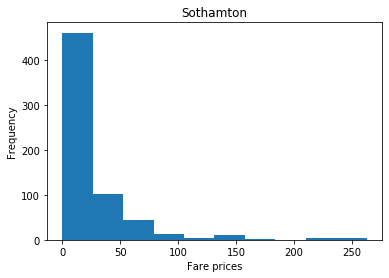

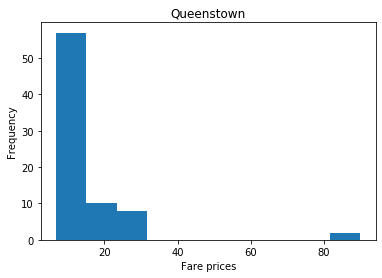

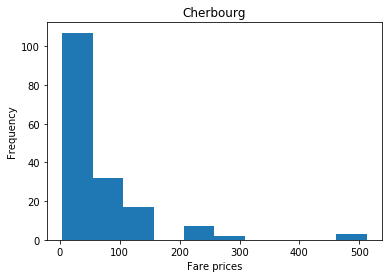

In [12]:
print("The minimum fare for ticket is ", np.round(df.Fare.min(),2))
print("The maximum fare for ticket is ", np.round(df.Fare.max(),2))
print("The mean fare for ticket is ", np.round(df.Fare.mean(),2))

print("The mean fare for ticket for passengers from Southampton is", np.round(df[df["Embarked"]=="S"].Fare.mean(),2))
print("The maximum fare for ticket for passengers from Southampton is", np.round(df[df["Embarked"]=="S"].Fare.max(),2))
print("The minimum fare for ticket for passengers from Southampton is", np.round(df[df["Embarked"]=="S"].Fare.min(),2))


plt.figure()

hist1 = df[df["Embarked"]=="S"].Fare.plot(kind='hist',sharex=True,title='Sothamton')

plt.xlabel('Fare prices')
plt.ylabel('Frequency')
print(hist1)

plt.figure()

hist2 = df[df["Embarked"]=="Q"].Fare.plot(kind='hist',sharex=True,title='Queenstown')

plt.xlabel('Fare prices')
plt.ylabel('Frequency')
print(hist2)

plt.figure()

hist3 = df[df["Embarked"]=="C"].Fare.plot(kind='hist',sharex=True,title='Cherbourg')

plt.xlabel('Fare prices')
plt.ylabel('Frequency')
print(hist3)

# your code here

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [18]:
df.drop(["PassengerId"], axis=1, inplace=True)
df.drop(["Ticket"], axis=1, inplace=True)

print(df)
# your code here

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin Embarked  
0      male  22.0      1     

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [19]:
# your code here
print(pd.isnull(df).sum())
print('There are missing values in Age (177), Cabin (687) and Embarked (2)')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
There are missing values in Age (177), Cabin (687) and Embarked (2)


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [20]:
# your code here

print(np.round(df['Age'].mean(), 2)) 
df['Age'].fillna(df['Age'].mean(), inplace = True) 
df['Cabin'].fillna('Na', inplace = True)
df['Embarked'].fillna('Na', inplace = True)

print(pd.isnull(df).sum())


29.7
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

          Fare       Age
Fare  1.000000  0.091566
Age   0.091566  1.000000
Correlation is low (there os almost no correlation at all)
AxesSubplot(0.125,0.125;0.775x0.755)


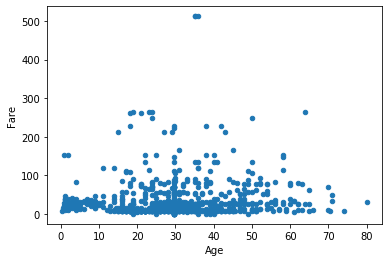

In [22]:
# your code here

df_1 = df[['Fare', 'Age']]
print(df_1.corr(method = 'pearson')) 
print('Correlation is low (there os almost no correlation at all)')
plot_1 = df.plot.scatter(x='Age', y='Fare')
print(plot_1)


### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса? А от места посадки?

In [26]:
# your code here

df_2 = df[['Fare', 'Survived']]
print(df_2.corr(method = 'pearson')) 
print('There is small positive correlation between Fare prices and survival')


df_3 = df[['Pclass', 'Survived']]
print(df_3.groupby('Pclass')['Survived'].describe())
print(df_3.corr(method = 'pearson')) 
print('There is small negative correlation between class and survival: it means that 1st class passengers are more likely to sutvive')

df_4 = df[['Embarked', 'Survived']]
print(df_4.groupby('Embarked')['Survived'].describe())
print('Passengers from Cherbourg survived with probability 0.55, Queenstown -- 0.39 and Southampton -- 0.34')


              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000
There is small positive correlation between Fare prices and survival
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2       184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3       491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0
            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000
There is small negative correlation between class and survival: it means that 1st class passengers are more likely to sutvive
          count      mean       std  min  25%  50%  75%  max
Embarked                                                    
C         168.0  0.553571  0.498608  0.0  0.0  1.0  1.0  1.0
Na          2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
Q          77.0  0.389610  0.490860  0.0  0.0  0.0  1.0  1.0
S         644.0  0.336957  0.47

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [27]:
# your code here
df.insert(8, "Relatives", df['SibSp'] + df['Parch'] + 1)
df.insert(9, "Oldlone", (df['Age'] > 50) & (df['Relatives'] < 2) == True) # old and lonely people are less likely to aurvive IMO
print(df)


     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch     Fare  Relatives  Oldlone Cabin  \
0      male 

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [ ]:
# your code here

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [ ]:
# your code here

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [28]:
# your code here
class_dummy = pd.get_dummies(df["Pclass"],prefix="Pclass")
embar_dummy =  pd.get_dummies(df["Embarked"], prefix = "Embarked")
sex_dummy = pd.get_dummies(df["Sex"], prefix = "Sex")

print(class_dummy, embar_dummy, sex_dummy)

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]      Embarked_C  Embarked_Na  Embarked_Q  Embarked_S
0             0            0           0           1
1             1            0           0           0
2             0            0           0           1
3             0            0           0           1
4             0            0           0           1
..          ...          ...         ...         ...
886           0            0           0           1
887           0            0           0           1
888           0            0           0           1
889           1            0          

## Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

Text(0.5, 0, 'Age')

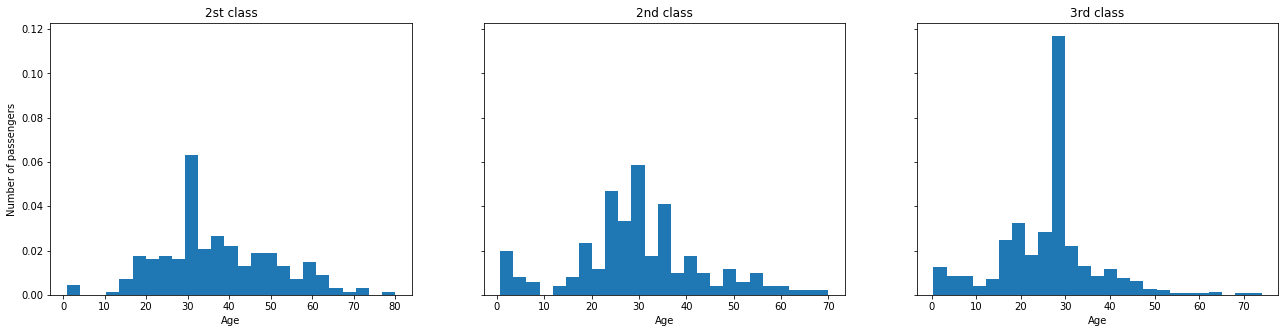

In [29]:
# В итоге ваш график должен получиться примерно таким:

fig, axes = plt.subplots(1, 3, sharey = True, figsize = (22, 5))
axes[0].hist(df[df['Pclass'] == 1]['Age'], bins = 25, 
             density = True)
axes[0].set_title('2st class')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of passengers')
axes[1].hist(df[df['Pclass'] == 2]['Age'], bins = 25, 
             density = True)
axes[1].set_title('2nd class')
axes[1].set_xlabel('Age')
axes[2].hist(df[df['Pclass'] == 3]['Age'], bins = 25, 
             density = True)
axes[2].set_title('3rd class')
axes[2].set_xlabel('Age')

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. 

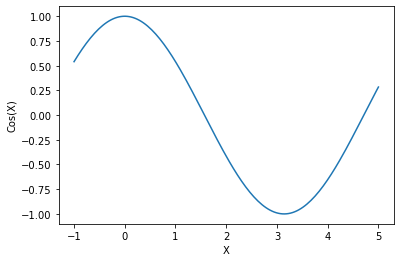

In [30]:
# В итоге ваш график должен получиться примерно таким:

x = np.linspace (-1, 5, 150)
plt.plot (x, np.cos(x))
plt.xlabel('X')
plt.ylabel('Cos(X)')
plt.show()

### 27

Используя функцию из задания №10 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_

Text(0, 0.5, 'y = kx + b + random noise')

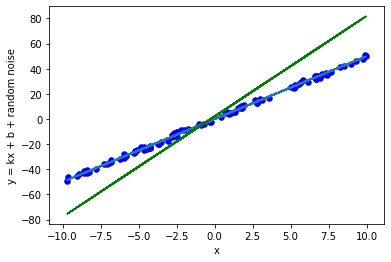

In [34]:
# В итоге ваш график должен получиться примерно таким:
!pip install seaborn
!pip install sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
#___________________________________________________
sample_x, sample_y = gen_data((-10, 10), 8, 2, 100, 2.7)
xnew = sample_x.reshape(-1, 1)
ynew = sample_y.reshape(-1, 1)
regr = LR()
regr.fit(xnew, ynew)
k_learned, b_learned = regr.coef_, regr.intercept_

test_x, test_y = gen_data((-10, 10), 5, 0, 100, 2.1)
test_xnew = test_x.reshape(-1, 1)
test_ynew = test_y.reshape(-1, 1)
plt.plot(test_xnew, 5*test_xnew)
plt.plot(test_xnew, b_learned + k_learned*test_xnew, color = 'green')
plt.scatter(test_xnew, test_ynew, s = 30, color = 'blue')
plt.xlabel('x')
plt.ylabel('y = kx + b + random noise')



